In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("income.csv")
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df['Age'].isnull().value_counts()

Age
False    22
Name: count, dtype: int64

In [6]:
df['Income($)'].isnull().value_counts()

Income($)
False    22
Name: count, dtype: int64

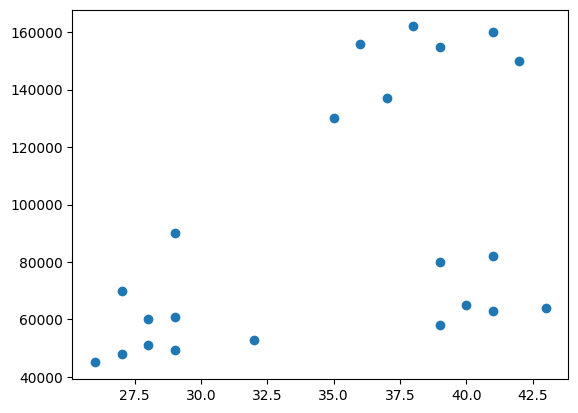

In [9]:
plt.scatter(df.Age, df['Income($)'])

In [10]:
model = KMeans(n_clusters= 3)
model

KMeans(n_clusters=3)

In [11]:
y_pred = model.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [22]:
center = model.cluster_centers_
center

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

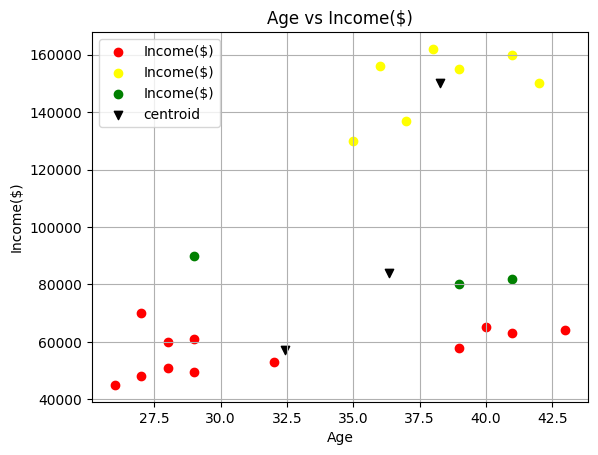

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.grid(True)
plt.scatter(df1.Age, df1['Income($)'], color = 'red', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'yellow', label = 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'green', label = 'Income($)')
plt.scatter(center[:,0], center[:,1], color = 'black', marker= 'v', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($)')

plt.legend()

You can see the scatter plot, those clusters are not evenly distributed and the centroids are not located in the unsuitable regions of their clusters. So we have to handle this to those cluster and centroids are located in suitable clusters

#### Using Min Max Scaler method to handle columns 'Age' and 'Income($)' to value about [0,1]

In [28]:
df['Age'][0]

27

In [33]:
#y = (x – min) / (max – min): this is the formula of MinMaxScaler method

#norminalize the column 'Age'
mms1 = []
for i in range(len(df['Age'])):
    y = (df['Age'][i] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
    mms1.append(y)
    
#norminalize the column 'Income'
mms2 = []
for i in range(len(df['Income($)'])):
    y = (df['Income($)'][i] - df['Income($)'].min()) / (df['Income($)'].max() - df['Income($)'].min())
    mms2.append(y)


In [36]:
df['Age'] = mms1
df['Income($)'] = mms2

In [37]:
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [38]:
df.drop('cluster', axis= 1, inplace= True)
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [39]:
km = KMeans(n_clusters= 3)
km

KMeans(n_clusters=3)

In [41]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [42]:
df['cluster'] = y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [43]:
center = km.cluster_centers_
center

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

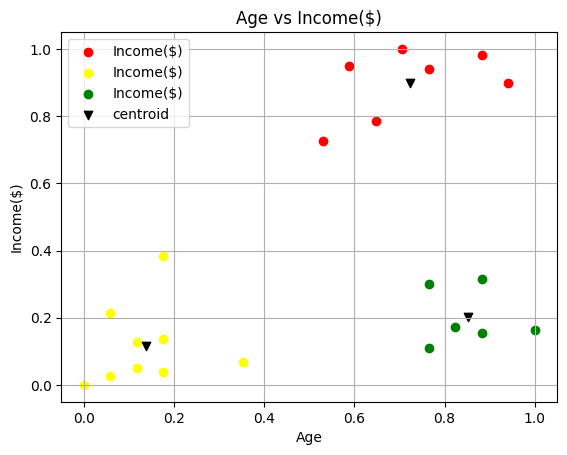

In [46]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.grid(True)
plt.scatter(df1.Age, df1['Income($)'], color = 'red', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'yellow', label = 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'green', label = 'Income($)')
plt.scatter(center[:,0], center[:,1], color = 'black', marker= 'v', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income($)')

plt.legend()

So now you can see the scatter plot those centroids are located in suitable of their clusters. It is different from the unsuitable scatter plot above

### Elbow Graph

In [47]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [48]:
sse

[5.434011511988177,
 2.091136388699077,
 0.4750783498553094,
 0.3491047094419565,
 0.27558255687229755,
 0.24591705034877775,
 0.18721104165755637,
 0.1394387593722909,
 0.1310582765289535]

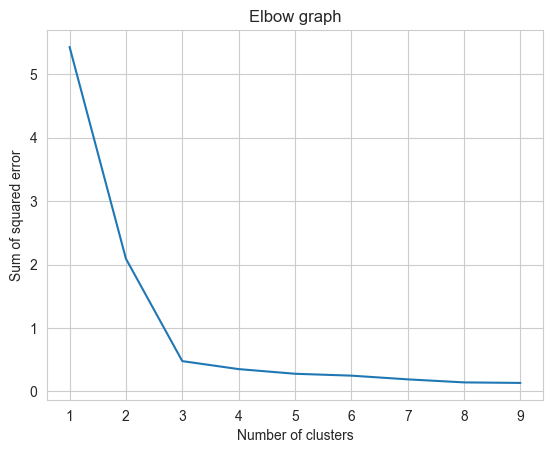

In [49]:
import seaborn as sns

sns.set_style('whitegrid')

g = sns.lineplot(x = range(1,10), y = sse)
g.set(xlabel = 'Number of clusters',
      ylabel = 'Sum of squared error',
      title = 'Elbow graph')

plt.show()